# Problem Statement 
   Predicting turbine energy yield (TEY) using ambient variables as features.
                                                                                                           

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Dataset
data = pd.read_csv("gas_turbines.csv")
data.head()


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
# EDA
data.shape

(15039, 11)

In [4]:
data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


<Axes: >

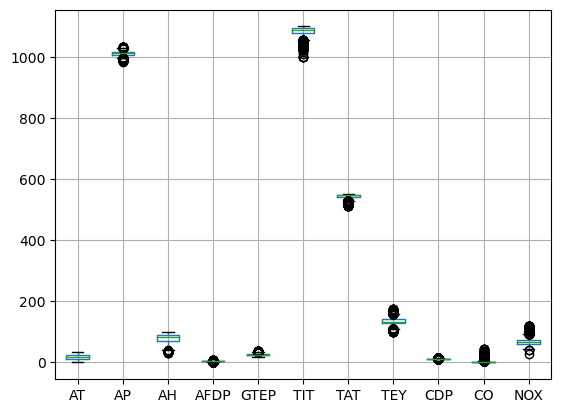

In [7]:
data.boxplot()

<Axes: >

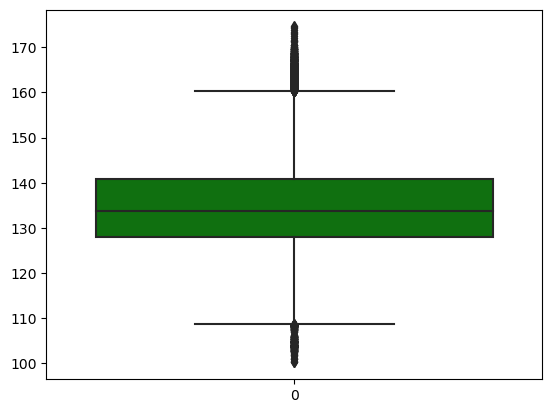

In [8]:
sns.boxplot(data['TEY'], color = 'Green')

In [9]:
x = data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= data[['TEY']]

In [10]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


### StandardScaler

In [11]:
sc = StandardScaler()
x = sc.fit_transform(x)
y = sc.fit_transform(y)

In [12]:
# Function to create model,for KerasRegressor
def create_my_model():
    #defining my model
    mymodel = Sequential()
    mymodel.add(Dense(10, input_dim=10, activation='tanh'))
    mymodel.add(Dense(1))
    
    # Compile the model
    mymodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return mymodel

In [13]:
model = KerasRegressor(build_fn=create_my_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(model, x, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.10 (0.09) MSE


In [14]:
model.fit(x, y)
prediction = model.predict(x)
prediction

array([-1.2917454, -1.2721033, -1.2707858, ..., -1.8144177, -1.818579 ,
       -1.71459  ], dtype=float32)

### Train Test Split

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [16]:
model.fit(xtrain, ytrain)
pred = model.predict(xtest)

In [17]:
pred

array([ 2.0608158 ,  0.50159466, -1.3521405 , ...,  1.531183  ,
       -0.09975109,  1.977928  ], dtype=float32)

In [18]:
# Define X and Y
x = data.drop(columns = ['TEY'], axis = 1) 
y = data.iloc[:,7]

In [19]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [20]:
# Train Test Split
from sklearn.preprocessing import scale
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train_scaled = scale(xtrain)
x_test_scaled = scale(xtest)
x_test_scaled

array([[ 0.82814817, -0.45368466, -0.25662885, ...,  0.11836719,
        -0.33429777, -0.69247893],
       [ 0.34970575,  0.20999964,  0.80098808, ..., -1.17514939,
         0.29412404, -1.09712292],
       [ 0.32501533, -0.0902385 ,  0.25384277, ...,  0.03412556,
        -0.02734093, -0.31731668],
       ...,
       [ 1.48218147, -0.7539228 , -1.07312356, ...,  0.89918742,
        -0.16635519, -0.87426732],
       [ 0.73766043, -0.20085255, -0.57268666, ...,  1.10752692,
        -0.51816852, -0.0952146 ],
       [ 0.31267013, -0.76972481,  0.22893644, ..., -1.24218036,
         1.64017066, -1.41671256]])

In [21]:
# Create model
import tensorflow as tf
input_size = len(x.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [22]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

### Early Stoping

In [23]:
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(x_train_scaled, ytrain, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
339/339 - 3s - loss: 3371.2700 - mean_squared_error: 3371.2700 - val_loss: 198.6940 - val_mean_squared_error: 198.6940 - 3s/epoch - 8ms/step
Epoch 2/100
339/339 - 1s - loss: 105.3662 - mean_squared_error: 105.3662 - val_loss: 89.4527 - val_mean_squared_error: 89.4527 - 1s/epoch - 3ms/step
Epoch 3/100
339/339 - 1s - loss: 50.5611 - mean_squared_error: 50.5611 - val_loss: 48.4470 - val_mean_squared_error: 48.4470 - 949ms/epoch - 3ms/step
Epoch 4/100
339/339 - 1s - loss: 26.8966 - mean_squared_error: 26.8966 - val_loss: 24.7310 - val_mean_squared_error: 24.7310 - 1s/epoch - 3ms/step
Epoch 5/100
339/339 - 1s - loss: 14.7460 - mean_squared_error: 14.7460 - val_loss: 14.1350 - val_mean_squared_error: 14.1350 - 1s/epoch - 3ms/step
Epoch 6/100
339/339 - 1s - loss: 8.2509 - mean_squared_error: 8.2509 - val_loss: 7.2084 - val_mean_squared_error: 7.2084 - 1s/epoch - 3ms/step
Epoch 7/100
339/339 - 1s - loss: 4.6870 - mean_squared_error: 4.6870 - val_loss: 4.3830 - val_mean_squared_erro

In [25]:
test_loss, mean_squared_error = model.evaluate(x_test_scaled, ytest)

94/94 [==============================] - 0s 4ms/step - loss: 0.6134 - mean_squared_error: 0.6134


In [26]:
pred = model.predict_on_batch(x_test_scaled)

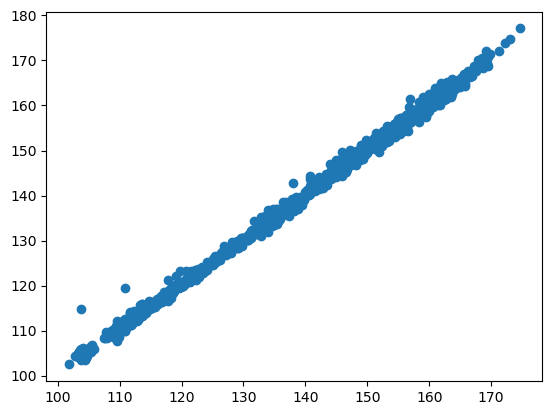

In [27]:
# Visualization of Actual & Predicted 
plt.scatter(ytest,pred)

In [29]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = ytest
predictions_df['Predicted'] = pred
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df

,Actual,Predicted,% Error
13312,134.46,134.602951,0.106315
12627,111.88,112.661232,0.698277
6393,133.72,134.664734,0.706502
4990,133.79,133.632477,0.117739
12462,110.77,111.322945,0.499183
...,...,...,...
11478,119.25,119.766808,0.433382
12302,133.74,133.745880,0.004397
13093,146.31,147.087982,0.531735
2699,150.07,149.927505,0.094952
